In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [191]:
life_data=pd.read_csv("Life Expectancy Data.csv")
life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## DATA PREPROCESSING

In [192]:
life_data.columns=life_data.columns.str.strip()
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [193]:
#number of missing values
life_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [194]:
life_data.dropna(subset=['Life expectancy','Adult Mortality'], inplace=True)
life_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

In [195]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
life_data[life_data.select_dtypes(include='number').columns] = imputer.fit_transform(life_data.select_dtypes(include='number'))
life_data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [196]:
le=LabelEncoder()
life_data['Status'] = le.fit_transform(life_data['Status'])
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,1,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,1,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,1,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,1,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,1,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001.0,1,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [197]:
x=life_data.drop(columns=['Life expectancy','Country','Year','Status'])
y=life_data['Life expectancy']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_test

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2225,217.0,0.0,4.14,49.936982,87.000000,0.0,24.7,0.0,98.0,7.44,97.0,1.2,894.927988,1.631100e+04,6.7,6.6,0.527,10.3
838,344.0,3.0,10.99,1493.051277,80.960842,0.0,22.6,4.0,39.0,3.29,41.0,7.7,21451.886170,9.942900e+04,8.9,8.8,0.580,9.2
2405,485.0,55.0,6.93,519.156378,71.000000,244.0,42.2,82.0,7.0,8.26,69.0,28.9,3775.682750,4.641819e+07,13.5,16.1,0.613,12.9
1969,122.0,1.0,5.53,623.910050,92.000000,0.0,5.3,2.0,88.0,7.48,92.0,0.1,4916.548860,3.334650e+05,2.1,2.1,0.740,12.9
305,189.0,8.0,3.62,0.000000,98.000000,0.0,51.9,10.0,99.0,6.33,98.0,0.1,7494.210719,1.276454e+07,1.2,1.1,0.666,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,225.0,1.0,0.01,281.002399,99.000000,0.0,51.5,1.0,99.0,4.73,99.0,0.1,4181.583321,2.923896e+06,2.2,2.3,0.729,14.8
1501,329.0,12.0,4.24,17.858708,80.960842,4.0,21.5,17.0,47.0,8.77,31.0,3.2,149.445255,3.176414e+06,8.5,8.5,0.335,10.2
2261,251.0,25.0,0.33,62.219779,80.960842,1519.0,18.7,44.0,73.0,5.40,73.0,0.7,642.766311,1.679900e+04,11.8,11.7,0.401,5.9
2079,83.0,0.0,1.24,44.185063,94.000000,361.0,65.1,0.0,97.0,2.31,94.0,0.1,675.612580,1.276454e+07,4.9,4.5,0.830,12.6


## APPLYING LINEAR REGRESSION

In [198]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [199]:
c=reg.intercept_
c

54.4900402600519

In [200]:
y_predict_train=reg.predict(x_train)
y_predict_train

array([69.79407054, 79.841775  , 71.61947384, ..., 61.29331694,
       53.58018779, 71.75304747])

Text(0, 0.5, 'Actual Life Expectancy')

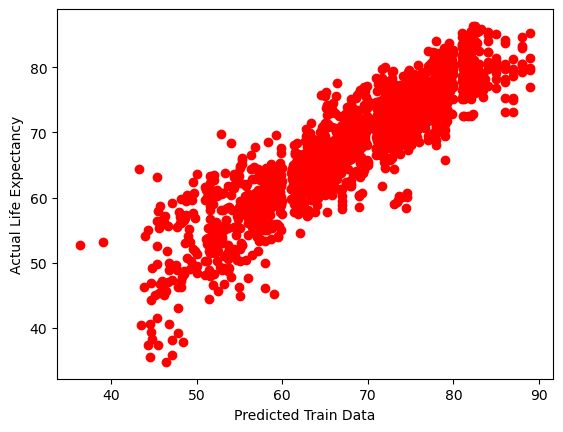

In [201]:
plt.scatter(y_train,y_predict_train,color="red")
plt.xlabel("Predicted Train Data")
plt.ylabel("Actual Life Expectancy")

In [202]:
y_predict_test=reg.predict(x_test)
y_predict_test

array([66.90999334, 58.1162391 , 47.40864214, 71.73922106, 72.62264337,
       71.40611906, 63.3512179 , 64.10072697, 71.42404909, 74.26396139,
       73.68896214, 72.19616458, 71.67986825, 73.43881235, 73.97846515,
       63.54157547, 71.67330353, 62.83163695, 61.49413027, 70.65492849,
       71.28970871, 63.58839585, 77.74416989, 68.24458491, 74.13609008,
       75.89812785, 66.09014072, 70.70659302, 69.40188124, 57.31688496,
       71.27557218, 79.62156406, 73.05817572, 67.22706179, 54.60270647,
       67.76361987, 56.37834344, 74.07314066, 76.49461639, 72.04677652,
       51.73477823, 72.9156326 , 74.89851244, 58.84538283, 76.73217811,
       72.85225194, 67.05940401, 49.25886104, 73.14267784, 77.29282648,
       78.72902265, 68.67612502, 79.37578539, 62.73634834, 62.78573031,
       80.74304106, 68.37073051, 69.55991652, 59.35001241, 71.37186521,
       81.36882697, 83.79127937, 40.13640992, 74.99922752, 73.465108  ,
       50.46857378, 63.96478774, 74.53179122, 57.50503099, 82.30

Text(0, 0.5, 'Actual Life Expectancy')

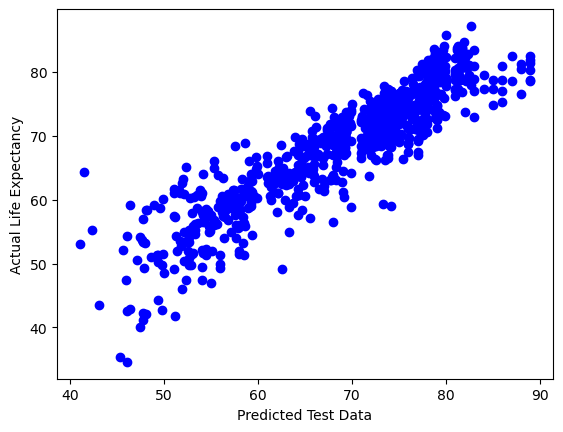

In [203]:
plt.scatter(y_test,y_predict_test,color="blue")
plt.xlabel("Predicted Test Data")
plt.ylabel("Actual Life Expectancy")

In [204]:
mse = mean_squared_error(y_test, y_predict_test)
r2 = r2_score(y_test, y_predict_test)

In [205]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 16.44
R-squared: 0.82


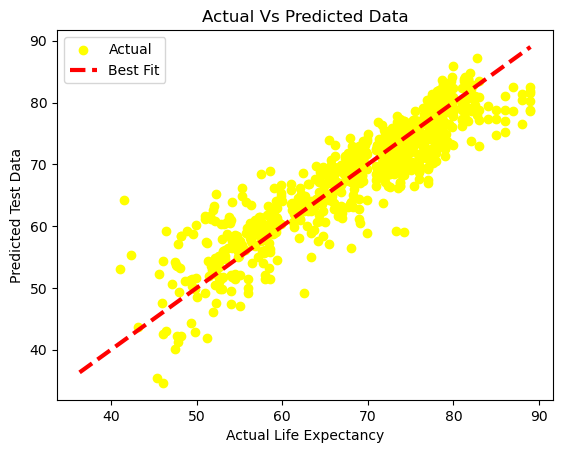

In [206]:
plt.scatter(y_test, y_predict, label='Actual',color="yellow")
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Test Data")
plt.title("Actual Vs Predicted Data")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--',linewidth=3, label='Best Fit')
plt.legend()
plt.show()

In [207]:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].y_test  # Use iloc to access row by integer location
        y = points.iloc[i].y_predict  # Use iloc to access row by integer location
        m_gradient += (-2/n) * x * (y - (m_now * x + b_now))
        b_gradient += (-2/n) * (y - (m_now * x + b_now))
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b


m = 0
b = 0
L = 0.0001
epochs = 100

for i in range(epochs):
    if (i % 50) == 0:
        print(f"Epoch: {i}")
    m, b = gradient_descent(m, b, life_data, L)


print(m, b)

plt.scatter(y_test,y_predict,color="black")
plt.plot(list(range(20,50)),[m*x+b for x in range (20,50)],color='red')
plt.show()

Epoch: 0


AttributeError: 'Series' object has no attribute 'y_test'